In [1]:
#weighted clustering; consider some form of weighing for observations

#be sure to mention that collectica ommitted 1 in 18 rows

#fold special back in

#Load in the data

import pandas as pd
data=pd.read_excel('typology.xlsx')
data.head()

,mergeid,sample,int_date,phase,fcall,attempts,refusal,stimes,ilang,p1version,...,ql1,ql1a,qc1,ll,cp,money2,ckinfo,iphoneuse,hphoneuse,weight
0,1100009,1,61417,1,170608,4,0,4,1,2,...,1,0,0,1,1,0,0,2,2,1.064516
1,1100012,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,4.000000
2,1100014,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.612903
3,1100018,1,61417,1,170608,6,1,6,1,2,...,1,0,0,1,1,0,0,2,2,3.741935
4,1100019,1,60817,1,170608,1,0,1,1,1,...,1,0,0,1,1,0,0,2,2,1.258065


In [2]:
#The next step is to remove questions that aren't super relevant to political opinion
list(data)

['mergeid',
 'sample',
 'int_date',
 'phase',
 'fcall',
 'attempts',
 'refusal',
 'stimes',
 'ilang',
 'p1version',
 'cregion',
 'state',
 'density',
 'usr',
 'scregion',
 'sstate',
 'susr',
 'igender',
 'irace',
 'llitext1',
 'llitext2',
 'qs1',
 'cpitext1',
 'cpitext2',
 'qa1',
 'qa1a',
 'qb2',
 'qb3',
 'qb4',
 'qa12',
 'qa14a',
 'qa14b',
 'qa14c',
 'qa14d',
 'qa14e',
 'qa15a',
 'qa15b',
 'qb18a',
 'qb18b',
 'q25a',
 'q25b',
 'q25c',
 'q25d',
 'q25f',
 'q25g',
 'q25i',
 'q25k',
 'q25n',
 'q25p',
 'qa26',
 'qa27',
 'qb27',
 'qb28',
 'qb29',
 'qa30',
 'qb30',
 'qb31',
 'oftvote',
 'qb32',
 'qb33',
 'qb33a',
 'cheat',
 'qa36a',
 'qa36b',
 'qa36c',
 'qa36d',
 'qa37a',
 'qa37b',
 'qa37c',
 'qa37d',
 'q40',
 'qb42a',
 'qb42b',
 'qb42c',
 'qb42d',
 'qb46',
 'q50r',
 'q50u',
 'q50y',
 'q50aa',
 'q50cc',
 'q50ee',
 'q50hh',
 'qbx',
 'qe2',
 'qe1',
 'qe3',
 'employ1',
 'employ7',
 'qe11',
 'q51jj',
 'q51ll',
 'q51mm',
 'q51nn',
 'q51pp',
 'q51qq',
 'q51rr',
 'qb52',
 'qb52x',
 'qb53a',
 'qb53b

In [3]:
myListall = [
 #'qa1',
 #'qa1a', # I need to make this into one question ommited because it is about Donald Trump, not a specific policy or value 
 #  ommited'qb2', #consider omitting 
 #  ommited'qb3', # consider omitting
 # ommited'qb4', # also consider omitting
 'qa12',
 'qa14a',
 'qa14b',
 'qa14c',
 'qa14d',
 'qa14e', 
 #ommited   'qa15a', #consider ommiting
 #ommited   'qa15b', #consider ommiting
 #ommited   'qb18a', #consider ommiting
 #ommited   'qb18b', #consider ommiting
 'q25a',
 'q25b',
 'q25c',
 'q25d',
 'q25f',
 'q25g',
 'q25i',
 'q25k',
 'q25n',
 'q25p', # good
 'qa26',
        #ommitted 'qa27',
        # ommited 'qb27',
        # ommited 'qb28',
        # ommited 'qb29',
        # ommited'qa30',
 'qb30',
 'qb31',
 'qa36a', #consider ommitting
 'qa36b', #consider ommitting
 'qa36c', #consider ommitting
 'qa36d', #consider ommitting
 'qa37a', #consider ommitting
 'qa37b', #consider ommitting
 'qa37c', #consider ommitting
 'qa37d', #consider ommitting
 # ommited 'qb42a', #consider ommitting
 # ommited 'qb42b', #consider ommitting
 # ommited 'qb42c', #consider ommitting
 # ommited 'qb42d', #consider ommitting 
 'q50r',
 'q50u',
 'q50y',
 'q50aa',
 'q50cc',
 'q50ee',
 'qbx',
 'q51jj', 
 'q51ll',
 'q51mm', 
 'q51nn',        
 # ommited, too vague 'q51pp', #consider ommiting
 'q51qq',       
 #too vague, ommited 'qb52', #consider ommiting
 'qb52x',
 #'qb55a', #ommited
 #'qb55b', #ommited
 'qa62',  #consider ommiting
 'qa77',
 'qa77a',
 'qa77b',
 'qa78',
 'qb80',
 'qa126',
 'qa126a',
 'qa126b',
 'qa127',
 'qa128',
 'qa129',
 'qa143', 
         ]

In [4]:
droplistf1 = ['q25p', 'qb30', 'qb31', 'qbx', 'q51mm', 'q51qq', 'qb52x', 'qb80']
form1 = list(set(myListall).difference(set(droplistf1)))
form1

['qa36a',
 'qa77b',
 'qa37c',
 'q50cc',
 'qa37d',
 'q50u',
 'qa78',
 'qa77a',
 'qa36d',
 'qa14c',
 'qa14a',
 'q25i',
 'qa14b',
 'qa129',
 'qa37b',
 'qa14d',
 'qa127',
 'q25a',
 'q50ee',
 'qa12',
 'qa126a',
 'qa128',
 'q25g',
 'qa14e',
 'qa36c',
 'q51ll',
 'q25d',
 'qa26',
 'q50aa',
 'qa126',
 'qa77',
 'q25n',
 'qa36b',
 'qa143',
 'q25k',
 'q51nn',
 'q50y',
 'q25b',
 'q51jj',
 'qa37a',
 'q50r',
 'q25c',
 'q25f',
 'qa62',
 'qa126b']

In [5]:
dat=data[form1]

In [6]:
dat.iloc[2500:2510, 0:20]

,qa36a,qa77b,qa37c,q50cc,qa37d,q50u,qa78,qa77a,qa36d,qa14c,qa14a,q25i,qa14b,qa129,qa37b,qa14d,qa127,q25a,q50ee,qa12
2500,1,0,2,1,2,1,2,2,2,9,1,2,9,2,2,9,1,2,2,2
2501,2,1,1,2,2,2,1,0,1,2,1,1,1,4,2,1,2,1,2,1
2502,1,0,2,1,2,1,2,1,2,2,1,2,1,3,2,9,1,2,1,2
2503,2,1,1,1,2,2,1,0,2,2,9,1,2,1,2,2,1,1,2,1
2504,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2505,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2506,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2507,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2508,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2509,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0


In [8]:
f1 = dat.iloc[0:2504 ,:]
f1.tail()

In [247]:
# 136: replace 9 w/ 0
# q25[all]: replace 5,9 w/0 
# q14[all] replace 3,9 w/0
# qa12 replace 9 w/0
# 50[all] replace 5,9 w/0
# 51[all] replace 5,9 w/0
# qa126[all] replace 9 w/ 0
# qa37[all]: replace 9 w/ 0
# qa26: replace 9 w, 0  
# qa36 [all] replace  w/ 0
# a143 replace 3,9, with 0
# qa126[all] replace 9 w / 0 
# qa127 replace 3,9 w/0
# qa78 replace 9 w/0






# q128 needs special treatment
# qa62 replace 9 w/ 0, replace 1 w/-1, replace 2 with -0.5, replace 3 with 1.
# must deal with 129 
# must deal with 77

In [248]:
list2 = ['qa128', 'qa62', 'qa129','qa77', 'qa77a', 'qa77b']
special = f1[list2]
f1 = f1.drop(list2, axis = 1) 
set(f1.values.flatten()) # check to make sure there are no unexpected values

In [251]:
f1 = f1.replace([3,5,9], 0)
f1 = f1.replace(1,-1)
f1 = f1.replace(2,1)
f1.head()

In [254]:
from sklearn.decomposition import PCA
pca = PCA(2)
principalComponents = pca.fit_transform(f1)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var )+1)]

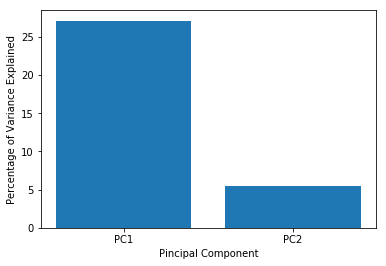

In [256]:
import matplotlib.pyplot as plt

plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Pincipal Component')
plt.show()


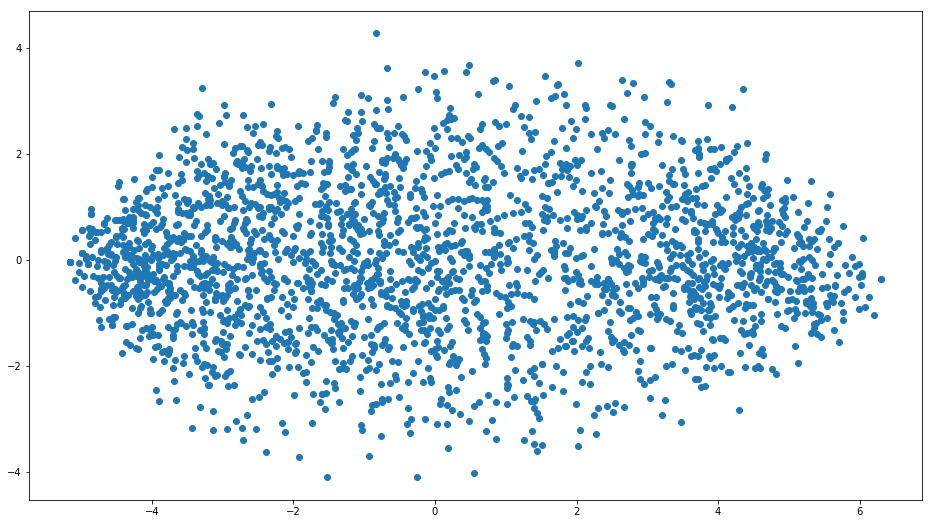

In [283]:
x = principalComponents[:,0]
y = principalComponents[:,1]
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x,y)
plt.figure(figsize=(1,2))
plt.show()